In [1]:
#数据 合并

# -*- coding:utf-8 -*-

import csv as csv

import numpy as np

import pandas as pd

df = pd.read_csv('oasis.csv') # 读取

dd = pd.read_csv('patients.csv')


data = pd.merge(df, dd, on=['subject_id'], how='left') # pandas csv表左连接

data = data[['subject_id', 'age_score', 'preiculos_score', 'gcs_score', 'heart_rate_score', 'mbp_score', 'resp_rate_score', 'temp_score', 'urineoutput_score', 'mechvent_score', 'electivesurgery_score', 'dod','oasis_prob']]


data.to_csv('result_oasis.csv', encoding='gbk')

print ('finish')

finish


In [2]:
#数据 清洗 和 处理

# -*- coding:utf-8 -*-

import csv as csv

import numpy as np

import pandas as pd

df = pd.read_csv('result_oasis.csv')          # 读取

df['dod'] = df['dod'].fillna('0')       #所有空的位置全部填为 0 

for i, element in enumerate(df['dod']):     #循环找到非0，再利用枚举和at函数，部改为 1
    
    if element != '0':
        df.at[i,'dod'] = '1'
    
#     if row.isnull() == False:
#         row = '1'
#     if pd.isna(row) == False:
#         print (df['dod'][row])
#         print (row)
#     else:
#         print('空')    


df = df.dropna()     #删除带有空值的数据
    

df.to_csv('result_c_oasis.csv', encoding='gbk')

print ('finish')

finish


0.7225609955133292


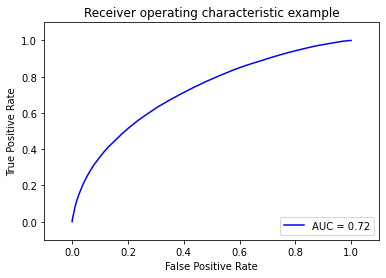

finish


In [6]:
#这个是oasis自己的死亡预测模型评估



# coding=UTF-8
from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
 
#真实值
y_train = pd.read_csv('y_train_result.csv')   # oasis比较特殊，因为我不需要建模，所以直接用 y_train 和 prob 就行

#模型预测值
prob = pd.read_csv('oasis_prob.csv') 

 
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)
 
 
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()

print ('finish')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kwargs.update(zip(sig.parameters, args))


0.7289488803960993


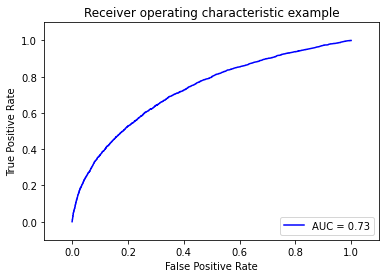

In [44]:
#这个是逻辑回归方法的死亡预测模型评估


# coding=UTF-8

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 


# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = LogisticRegression()       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)
 
 
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()



0.7384471939082572


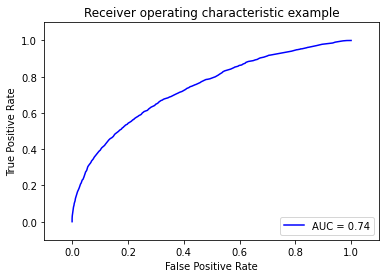

In [57]:
#这个是决策树方法的死亡预测模型评估


# coding=UTF-8

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()


<ipython-input-5-14db82dbe8f2>:28: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7484896141162712


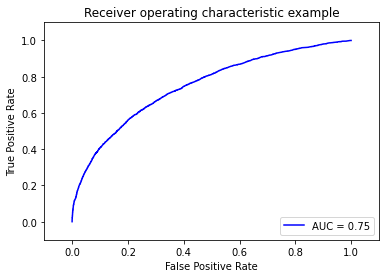

In [5]:
#这个是随机森林的死亡预测模型评估


# coding=UTF-8

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7495545576217549


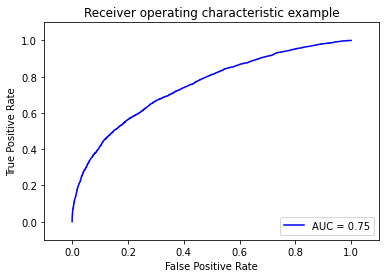

In [60]:
#这个是深度学习神经网络方法的死亡预测模型评估


# coding=UTF-8

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = MLPClassifier()       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()

In [5]:
#这个是随机森林前5个实例的解释（shapley）

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd


X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=X_train)
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

Using 56558 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [5]:
#这个是神经网络前5个实例的解释（Shapley）

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())



from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd


X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = MLPClassifier()

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=X_train)
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Using 56558 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [6]:
#随机森林的 LIME 解释

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import LimeTabular

X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [4]:
#神经网络的 LIME 解释

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import LimeTabular

X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = MLPClassifier()

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [7]:
#Partial Dependence Plot 随机森林

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import PartialDependence


X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global()

show(pdp_global)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [2]:
#Partial Dependence Plot 神经网络

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import PartialDependence


X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = MLPClassifier()

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global()

show(pdp_global)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
#随机森林 Morris Sensitivity Analysis

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import MorrisSensitivity

X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

msa = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
msa_global = msa.explain_global()

show(msa_global)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [4]:
#神经网络 Morris Sensitivity Analysis

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import MorrisSensitivity

X = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = MLPClassifier()

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

msa = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
msa_global = msa.explain_global()

show(msa_global)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

